<a href="https://colab.research.google.com/github/binthafra/AnroidSenors/blob/master/LSTM_for_Predict_HARIntensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installation 

In [ ]:
pip uninstall scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-1.0.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-1.0.2


In [ ]:
pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 5.0 MB/s 
     |████████████████████████████████| 24.8 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tabgan 1.2.0 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.2 which is incompatible.


In [8]:
pip install tabgan

     |████████████████████████████████| 45 kB 3.4 MB/s 
     |████████████████████████████████| 82 kB 322 kB/s 
     |████████████████████████████████| 6.8 MB 63.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [5]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 98 kB 6.4 MB/s 


In [ ]:
pip install scikit-learn==0.23.2

  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.23.2 which is incompatible.


# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import preprocessing
%matplotlib inline
from scipy.signal import butter, lfilter, freqz
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs


import SMOTE

In [2]:
from collections import Counter
from imblearn.over_sampling import SMOTE

#### import Keras Tuner 


In [3]:
import keras_tuner as kt
from tensorflow import keras

#### import GAN

In [4]:
from tabgan.sampler import OriginalGenerator, GANGenerator
import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


# Load Dataset

In [ ]:
df = pd.read_csv("Final_Thesis_data.csv")
df.head()

,Acc_X,Acc_Y,Acc_Z,Hr,Class
0,2.660984,-9.653030,0.470237,101,1
1,2.223091,2.223091,2.223091,101,1
2,2.098372,-9.481953,0.926070,101,1
3,2.716461,-9.739352,0.912008,101,1
4,2.288388,-9.371498,0.910390,101,1


In [ ]:
df = df.drop('Hr', axis=1)  
df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
25952,-1.149815,6.930615,3.587711,20
25953,-1.353322,6.947375,3.072958,20
25954,-1.459266,7.430405,3.296816,20
25955,-0.933739,8.090008,2.895188,20


In [ ]:
df = pd.read_csv("merged(old+generated)_sorted.csv")
df.head()

# See Data Description

In [ ]:
df.describe()

,Acc_X,Acc_Y,Acc_Z,Hr,Class
count,25957.000000,25957.000000,25957.000000,25957.000000,25957.000000
mean,-0.510749,-6.345121,2.923308,102.124668,10.366028
std,3.285892,4.878662,3.871105,28.436607,6.050047
min,-19.609110,-19.608511,-19.608511,58.000000,1.000000
25%,-1.916800,-9.799809,0.351666,85.000000,5.000000
50%,0.041079,-9.328170,1.650591,97.000000,10.000000
75%,1.472404,-2.163065,7.428518,114.000000,16.000000
max,19.607914,19.608511,18.631678,163.000000,20.000000


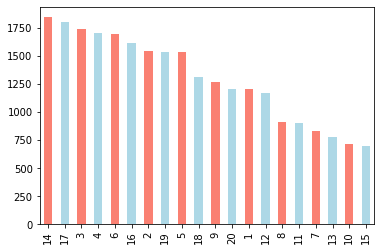

In [ ]:
df["Class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

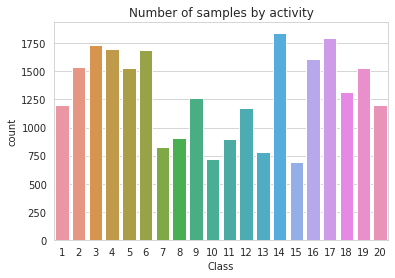

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = 'Class', data = df)
plt.title("Number of samples by activity")
plt.show()

In [ ]:
df = df.drop('Hr', axis=1)  
df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
25952,-1.149815,6.930615,3.587711,20
25953,-1.353322,6.947375,3.072958,20
25954,-1.459266,7.430405,3.296816,20
25955,-0.933739,8.090008,2.895188,20


In [ ]:
df.shape

(25957, 4)

In [ ]:
df["Class"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
df.isnull().sum()

Acc_X    0
Acc_Y    0
Acc_Z    0
Class    0
dtype: int64

In [ ]:
# Let's find out how many of each class there
df["Class"].value_counts(ascending= True)

15     691
10     716
13     779
7      827
11     900
8      911
12    1170
1     1200
20    1201
9     1264
18    1314
5     1532
19    1533
2     1541
16    1611
6     1690
4     1699
3     1737
17    1796
14    1845
Name: Class, dtype: int64

In [ ]:
#dropping target column
X = df.drop('Class', axis=1)  
#taking target column
y = df['Class']
#df.head

In [ ]:
#defining new dataframe
B = pd.DataFrame(columns=['Acc_X', 'Acc_Y', 'Acc_Z','Class'])
C = pd.DataFrame(columns=['Acc_X', 'Acc_Y', 'Acc_Z','Class'])
D = pd.DataFrame(columns=['Acc_X', 'Acc_Y', 'Acc_Z','Class'])

In [ ]:
#printing data properties
print(df.head(5))
print("DF DTYPE: ",df.dtypes)
print("DF SHAPE: ",df.shape)
#checking null value
print("DF ISNULL: ",df.isnull().sum())

      Acc_X     Acc_Y     Acc_Z  Class
0  2.660984 -9.653030  0.470237      1
1  2.223091  2.223091  2.223091      1
2  2.098372 -9.481953  0.926070      1
3  2.716461 -9.739352  0.912008      1
4  2.288388 -9.371498  0.910390      1
DF DTYPE:  Acc_X    float64
Acc_Y    float64
Acc_Z    float64
Class      int64
dtype: object
DF SHAPE:  (25957, 4)
DF ISNULL:  Acc_X    0
Acc_Y    0
Acc_Z    0
Class    0
dtype: int64


# Apply GAN

In [ ]:
#split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20765, 3) (5192, 3) (20765,) (5192,)


In [ ]:
type(X_train)
type(y_train)

pandas.core.series.Series

In [ ]:
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_test)

In [ ]:
new_X, new_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.001, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,
           gan_params = {"batch_size": 500, "patience": 25, "epochs" : 100,}).generate_data_pipe(X_train, y_train,
                                                                          X_val, deep_copy=True, only_adversarial=False, use_adversarial=True)
           

Fitting CTGAN transformers for each column:   0%|          | 0/4 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
print(new_X.shape)
print(new_y.shape)

(54650, 3)
(54650,)


In [ ]:
new_X

,Acc_X,Acc_Y,Acc_Z
0,-5.404578,-10.238978,7.613756
1,2.393092,-10.002221,3.609153
2,-5.466575,-10.684947,6.230080
3,1.411670,-9.641767,5.480655
4,-0.482153,-12.394978,6.732179
...,...,...,...
54645,1.346183,-10.315529,0.538298
54646,-0.244367,-9.920942,0.221486
54647,2.527383,-9.144762,0.834388
54648,-5.593669,-9.419888,3.225485


In [ ]:
new_y

0        21
1         2
2        13
3        21
4         0
         ..
54645     3
54646     4
54647     4
54648     9
54649    15
Name: Class, Length: 54650, dtype: int64

In [ ]:
type(new_X)
type(new_y)

pandas.core.series.Series

In [ ]:
new_y.unique()

array([21,  2, 13,  0,  3, 14, 20,  9,  1,  5,  8,  7, 12, 18,  4, 10, 15,
        6, 11, 17, 16, -1, 19, 22])

In [ ]:
new_X.to_csv("Generate_new_X.csv")
new_y.to_csv("Generate_new_y.csv")

new_X = pd.read_csv("Generate_new_X.csv")
new_y =pd.read_csv("Generate_new_y.csv")


generated_df = pd.concat([new_X,new_y],axis=1, join='inner')
generated_df

generated_df = generated_df.drop("Unnamed: 0", axis=1)
generated_df

gan_csv =generated_df.to_csv("Generate_new_df.csv")

df = pd.read_csv("Final_Thesis_data.csv")
df.head()

df = df.drop('Hr', axis=1)  
df

final_df = df.append(generated_df)
final_df

final_df.to_csv("merged.csv")

In [ ]:
final_df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
54645,1.346183,-10.315529,0.538298,3
54646,-0.244367,-9.920942,0.221486,4
54647,2.527383,-9.144762,0.834388,4
54648,-5.593669,-9.419888,3.225485,9


In [ ]:
final_df.shape

(80607, 4)

In [ ]:
df1= final_df[final_df.Class != -1]
df1

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
54645,1.346183,-10.315529,0.538298,3
54646,-0.244367,-9.920942,0.221486,4
54647,2.527383,-9.144762,0.834388,4
54648,-5.593669,-9.419888,3.225485,9


In [ ]:
df1["Class"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21,  0, 22])

#   Import Final Dataset including raw+generate

In [6]:
df = pd.read_csv("merged_sorted.csv")
df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
76586,-1.396418,-9.291298,1.890821,20
76587,1.073079,-9.134428,-8.070964,20
76588,-0.123900,-9.674969,0.472855,20
76589,0.544304,-11.164448,-5.944575,20


In [7]:
df["Class"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [9]:
df.isnull().sum()

Acc_X    0
Acc_Y    0
Acc_Z    0
Class    0
dtype: int64

# Outlier Analysis using BoX Plot

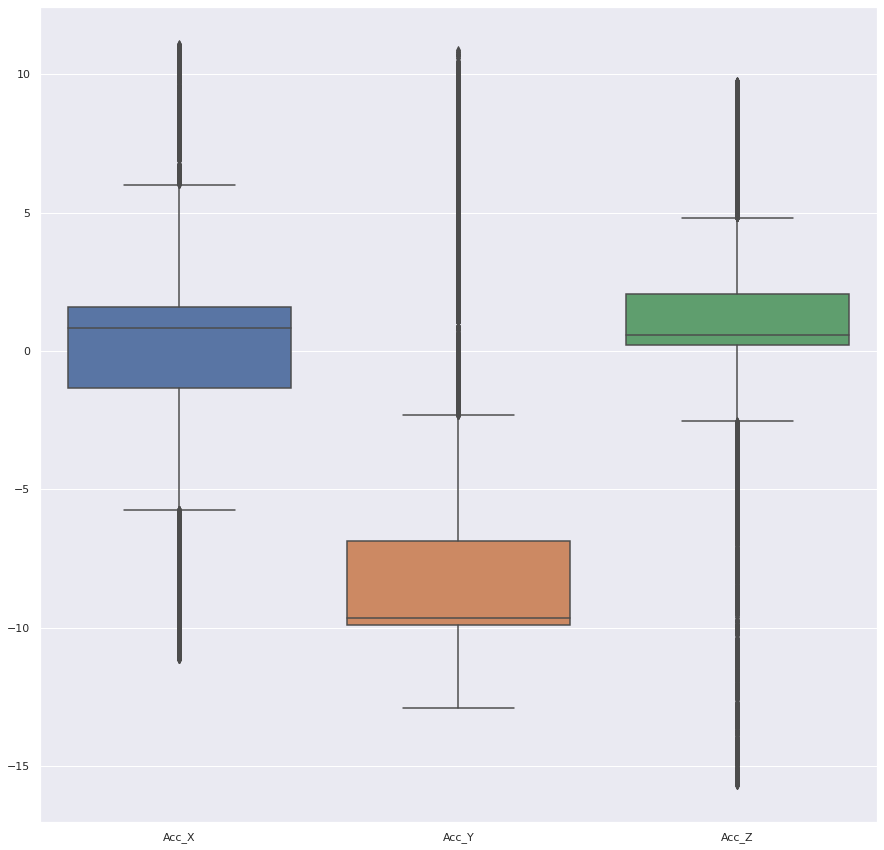

In [10]:
#boxplot for data with outliers
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig= sns.boxplot(data=df.iloc[0:25955,0:3])
figure=fig.get_figure()
figure.savefig("withOutliers.png")
#df.head
#print(df.iloc[0,0:6])

In [11]:
f=0
g=0
p=0

#finding first and last index of every class
ind=df.index.to_series().groupby(df['Class']).agg(['first','last']).reset_index()
print(ind)

    Class  first   last
0       1      0   3324
1       2   3325   7913
2       3   7914  12910
3       4  12911  17254
4       5  17255  22104
5       6  22105  26773
6       7  26774  29688
7       8  29689  32992
8       9  32993  36705
9      10  36706  39008
10     11  39009  41578
11     12  41579  45763
12     13  45764  49959
13     14  49960  55807
14     15  55808  58306
15     16  58307  62173
16     17  62174  66455
17     18  66456  69736
18     19  69737  73433
19     20  73434  76590


### Detecting and replacing outliers by mean

In [12]:
#detecting and replacing outliers by mean
for m in range(0,19):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        #print("For i=i.value")
        Avg= np.mean(A.iloc[:,i])
        #print(Avg)
        Q1 = A.iloc[:,i].quantile(0.25)
        #print(Q1)
        Q3 = A.iloc[:,i].quantile(0.75)
        #print(Q3)
        IQR = Q3 - Q1
        lim1=(Q1 - 1.5 * IQR)
        #print(lim1)
        lim2=(Q3 + 1.5 * IQR)
        #print(lim2)
        #print(IQR)
        for ami in range(first,last+1):
            com=df.iloc[ami,i]
            if ((com < lim1) |(com > lim2)):
                #print(newdf.iloc[ami,i])
                df.iloc[ami,i] = Avg
                #print(Avg)
                #print(newdf.iloc[ami,i])
                f=f+1
                #C= A.replace(((A.iloc[ami,i] < (Q1 - 1.5 * IQR)) |(A.iloc[:,i] > (Q3 + 1.5 * IQR))), Avg)
        print(f)
    if(p<19):
        p=p+1

(0, 4)
0
3324
0
0
(3325, 4)
3325
7913
805
1781
(4589, 4)
7914
12910
2913
3884
(4997, 4)
12911
17254
8057
9036
(4344, 4)
17255
22104
13886
15570
(4850, 4)
22105
26773
20239
21831
(4669, 4)
26774
29688
24746
27506
(2915, 4)
29689
32992
30810
34114
(3304, 4)
32993
36705
37827
41540
(3713, 4)
36706
39008
43843
46146
(2303, 4)
39009
41578
48716
51286
(2570, 4)
41579
45763
55471
59656
(4185, 4)
45764
49959
63852
68048
(4196, 4)
49960
55807
73896
79744
(5848, 4)
55808
58306
82243
84742
(2499, 4)
58307
62173
88609
92476
(3867, 4)
62174
66455
96758
101040
(4282, 4)
66456
69736
104321
107602
(3281, 4)
69737
73433
111299
114996


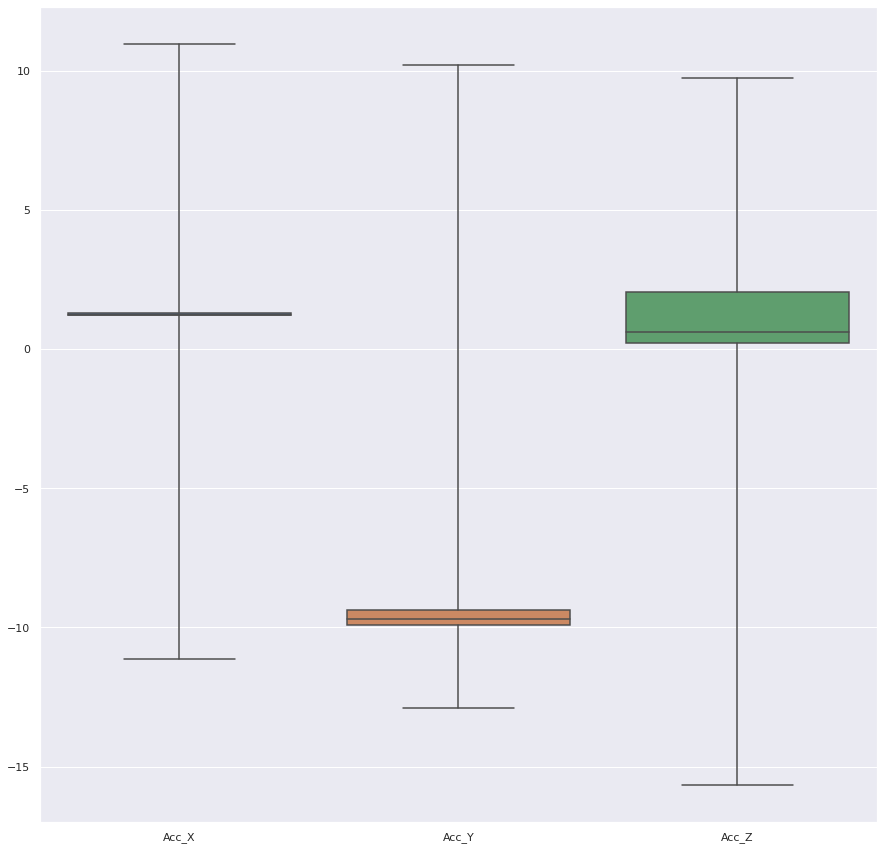

In [13]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=df.iloc[0:22955,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()
figure.savefig("withOut_Outliers.png")

In [ ]:
#save the datset without outlier
df.to_csv('withoutoutlier.csv')

#  Apply Butterworth Filter

In [14]:
#defining function for low pass filter
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


In [15]:
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    print(b,a)
    y = lfilter(b, a, data)
    return y

In [16]:
#filtering data with low pass filter
for m in range(0,19):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        df.iloc[first:last+1,i]= butter_lowpass_filter(df.iloc[first:last+1,i], 10, 100, 10)

(0, 4)
73434
76590
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
(3325, 4)
73434
76590
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.5601749

In [17]:
#save the datset without outlier
df.to_csv('filtered_data.csv')

In [18]:
#taking filtered data into new dataframe
B=df

#separating target column
X = B.drop('Class', axis=1)  
y = B['Class']

In [19]:
X,y

(          Acc_X      Acc_Y     Acc_Z
 0      2.660984  -9.653030  0.470237
 1      2.223091   2.223091  2.223091
 2      2.098372  -9.481953  0.926070
 3      2.716461  -9.739352  0.912008
 4      2.288388  -9.371498  0.910390
 ...         ...        ...       ...
 76586 -2.379324 -10.981612  1.890821
 76587 -3.117276 -11.210597 -8.070964
 76588 -3.540998 -11.288910  0.472855
 76589 -3.601910 -11.183172 -5.944575
 76590 -3.328972 -10.903193  1.447295
 
 [76591 rows x 3 columns], 0         1
 1         1
 2         1
 3         1
 4         1
          ..
 76586    20
 76587    20
 76588    20
 76589    20
 76590    20
 Name: Class, Length: 76591, dtype: int64)

# Encoding

In [ ]:
#one hot encoder for target column
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
y = np_utils.to_categorical(encoded_Y)

# defining properties for LSTM

In [20]:
#defining properties for LSTM
N_TIME_STEPS = 1
N_FEATURES = 3
step = 1
segments = []
labels = []

#segemting data
for i in range(0, len(B) - N_TIME_STEPS, step):
    accxs = B['Acc_X'].values[i: i + N_TIME_STEPS]
    accys = B['Acc_Y'].values[i: i + N_TIME_STEPS]
    acczs = B['Acc_Z'].values[i: i + N_TIME_STEPS]
    label = stats.mode(B['Class'][i: i + N_TIME_STEPS])[0][0]
    segments.append([accxs, accys, acczs]) # acczs,
    labels.append(label)
    
#print("SEGMENTS: ",segments)
#print("LABELS: ",labels)
print("SEGMENTS SHAPE: ",np.array(segments).shape)
print("LABELS SHAPE: ",np.array(labels).shape)
#pd.get_dummies(labels)  

SEGMENTS SHAPE:  (76590, 3, 1)
LABELS SHAPE:  (76590,)


In [21]:
#shaping data into 3d
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

print("RESHAPE SHAPE: ",reshaped_segments.shape)
print("LABELS: ",labels[0])

RESHAPE SHAPE:  (76590, 1, 3)
LABELS:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
x_train_f = pd.DataFrame.from_records(X_train)



```
# This is formatted as code
```

# Generate synthetic data Complete

In [ ]:
dfn = pd.read_csv("Final_Thesis_data.csv")
dfn.head()

,Acc_X,Acc_Y,Acc_Z,Hr,Class
0,2.660984,-9.653030,0.470237,101,1
1,2.223091,2.223091,2.223091,101,1
2,2.098372,-9.481953,0.926070,101,1
3,2.716461,-9.739352,0.912008,101,1
4,2.288388,-9.371498,0.910390,101,1


In [ ]:
dfn = dfn.drop('Hr', axis=1)  
dfn

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
25952,-1.149815,6.930615,3.587711,20
25953,-1.353322,6.947375,3.072958,20
25954,-1.459266,7.430405,3.296816,20
25955,-0.933739,8.090008,2.895188,20


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
#dropping target column
X = dfn.drop('Class', axis=1)  
#taking target column
y = dfn['Class']
#df.head


In [ ]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20765, 3) (5192, 3) (20765,) (5192,)


In [ ]:
X_train

,Acc_X,Acc_Y,Acc_Z
3959,1.381420,-9.609592,1.670558
3120,0.982794,-9.994711,1.269999
1337,2.277844,-9.893566,0.604144
19660,-6.027760,2.344517,7.431120
13315,-2.035724,-9.345648,2.049498
...,...,...,...
10033,2.152643,-10.269879,0.813128
2532,1.498444,-9.977983,0.962574
24371,8.052897,-1.620874,-4.802769
4390,1.453366,-10.115497,0.277995


In [ ]:
y_train

3959      3
3120      3
1337      2
19660    16
13315    11
         ..
10033     7
2532      2
24371    19
4390      3
19700    16
Name: Class, Length: 20765, dtype: int64

In [ ]:
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_test)

In [ ]:
from tabgan.sampler import GANGenerator

new_X, new_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.001, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,
           gan_params = {"batch_size": 500, "patience": 25, "epochs" : 100,}).generate_data_pipe(X_train, y_train,
                                                                          X_test, deep_copy=True, only_adversarial=False, use_adversarial=True)
           

Fitting CTGAN transformers for each column:   0%|          | 0/4 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
print(new_X.shape)
print(new_y.shape)

(52679, 3)
(52679,)


In [ ]:
new_X

,Acc_X,Acc_Y,Acc_Z
0,1.533801,-9.870922,5.409079
1,-0.169480,-10.433447,6.957382
2,-0.097775,-9.755437,6.675063
3,3.099341,-9.971825,5.606155
4,1.008388,-11.125423,8.530288
...,...,...,...
52674,1.426844,-9.672765,2.351608
52675,0.286000,-9.934650,1.579180
52676,0.852002,-9.895819,0.398263
52677,2.609971,-9.583934,0.385951


In [ ]:
new_y

0        22
1        11
2         9
3        12
4        15
         ..
52674     2
52675     9
52676     5
52677     5
52678    17
Name: Class, Length: 52679, dtype: int64

In [ ]:
new_y.unique()

array([22, 11,  9, 12, 15,  0, 16, 13, 17,  5, 21,  4, 19, -1,  2,  7, 14,
       20,  8,  1,  6, 10, 18,  3])

In [ ]:
generated_df = pd.concat([new_X,new_y],axis=1, join='inner')
generated_df

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Unnamed: 0,Class
0,0,9.556558,-9.222850,4.827902,0,14
1,1,6.318158,-9.062034,7.952014,1,7
2,2,6.775466,-9.055335,6.759527,2,16
3,3,6.150499,-12.006813,5.038735,3,13
4,4,7.132137,-9.041990,8.651838,4,16
...,...,...,...,...,...,...
54319,54319,2.362746,-9.458422,0.746228,54319,1
54320,54320,-0.718858,-9.248876,3.212232,54320,9
54321,54321,1.192453,-10.183977,0.279459,54321,1
54322,54322,0.058293,-9.904835,0.097371,54322,2


In [ ]:
generated_df = generated_df.drop("Unnamed: 0", axis=1)
generated_df

,Acc_X,Acc_Y,Acc_Z,Class
0,9.556558,-9.222850,4.827902,14
1,6.318158,-9.062034,7.952014,7
2,6.775466,-9.055335,6.759527,16
3,6.150499,-12.006813,5.038735,13
4,7.132137,-9.041990,8.651838,16
...,...,...,...,...
54319,2.362746,-9.458422,0.746228,1
54320,-0.718858,-9.248876,3.212232,9
54321,1.192453,-10.183977,0.279459,1
54322,0.058293,-9.904835,0.097371,2


In [ ]:
gan_csv =generated_df.to_csv("Generate_new_df.csv")

In [ ]:
df = pd.read_csv("Final_Thesis_data.csv")
df.head()

,Acc_X,Acc_Y,Acc_Z,Hr,Class
0,2.660984,-9.653030,0.470237,101,1
1,2.223091,2.223091,2.223091,101,1
2,2.098372,-9.481953,0.926070,101,1
3,2.716461,-9.739352,0.912008,101,1
4,2.288388,-9.371498,0.910390,101,1


In [ ]:
df = df.drop('Hr', axis=1)  
df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
25952,-1.149815,6.930615,3.587711,20
25953,-1.353322,6.947375,3.072958,20
25954,-1.459266,7.430405,3.296816,20
25955,-0.933739,8.090008,2.895188,20


In [ ]:
final_df = df.append(generated_df)
final_df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
54319,2.362746,-9.458422,0.746228,1
54320,-0.718858,-9.248876,3.212232,9
54321,1.192453,-10.183977,0.279459,1
54322,0.058293,-9.904835,0.097371,2


In [ ]:
final_df.to_csv("merged.csv")

In [ ]:
new_y = new_y.to_frame().T
new_y = new_y.T

In [ ]:
X_train_com = np.concatenate((X_train, new_X))
y_train_com = np.concatenate((y_train, new_y))

#  LSTM Model

In [ ]:
from sklearn.model_selection import train_test_split

random_seed = 42   

X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)
print("LENGTH X: ",len(X_train))
print("LENGTH Y: ",len(X_test))
print(X_train)

LENGTH X:  61272
LENGTH Y:  15318
[[[ 1.229076  -9.736979   3.7835176]]

 [[ 1.229076  -9.72554    1.0118922]]

 [[ 1.229076  -9.736979   2.549521 ]]

 ...

 [[ 1.229076  -9.736979   9.264352 ]]

 [[ 1.59223   -9.797394   0.694684 ]]

 [[ 1.2340225 -9.916605   0.162861 ]]]


In [ ]:
random_seed = 42   
n_time_steps = 50 
n_features = 3 
step = 10 
n_classes = 6 
n_epochs = 500       
batch_size = 256   
learning_rate = 0.00015
l2_loss = 0.0015

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout

In [ ]:
# Initialising the LSTM
classifier = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 256, return_sequences = True, activation='tanh'))
#classifier.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 128, return_sequences = True, activation='tanh'))
#classifier.add(Dropout(0.1))
classifier.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 64, return_sequences = True, activation='relu'))
#classifier.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 32, activation='tanh'))
#classifier.add(Dropout(0.1))

# Adding the output layer
classifier.add(Dense(units = 20, activation='softmax'))

# Compiling the LSTM
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Saving Best Model Only

check_point = tf.keras.callbacks.ModelCheckpoint('Best_model.h5', monitor='accuracy', save_best_only=True)

In [ ]:
history = classifier.fit(X_train, y_train, epochs = 500, validation_split = 0.20, batch_size = batch_size, verbose = 1)

Epoch 1/500
192/192 [==============================] - 15s 36ms/step - loss: 0.2877 - accuracy: 0.0539 - val_loss: 0.1989 - val_accuracy: 0.0744
Epoch 2/500
192/192 [==============================] - 6s 29ms/step - loss: 0.1965 - accuracy: 0.1008 - val_loss: 0.1952 - val_accuracy: 0.1040
Epoch 3/500
192/192 [==============================] - 6s 30ms/step - loss: 0.1941 - accuracy: 0.1105 - val_loss: 0.1936 - val_accuracy: 0.1058
Epoch 4/500
192/192 [==============================] - 5s 28ms/step - loss: 0.1927 - accuracy: 0.1129 - val_loss: 0.1923 - val_accuracy: 0.1106
Epoch 5/500
192/192 [==============================] - 6s 32ms/step - loss: 0.1908 - accuracy: 0.1243 - val_loss: 0.1887 - val_accuracy: 0.1409
Epoch 6/500
192/192 [==============================] - 6s 29ms/step - loss: 0.1869 - accuracy: 0.1461 - val_loss: 0.1847 - val_accuracy: 0.1473
Epoch 7/500
192/192 [==============================] - 6s 29ms/step - loss: 0.1832 - accuracy: 0.1529 - val_loss: 0.1809 - val_accuracy

#  2nd LSTM MODEL

In [ ]:
# Initialising the LSTM
model2 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 512, return_sequences = True, activation='tanh'))
model2.add(LSTM(units = 256, return_sequences = True, activation='tanh'))
model2.add(LSTM(units = 128, return_sequences = True, activation='tanh'))

model2.add(Dropout(0.5))
model2.add(LSTM(units = 64, return_sequences = True, activation='relu'))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 32, activation='tanh'))
model2.add(tf.keras.layers.Flatten())
model2.add(Dense(units = 20, activation='softmax'))
model2.add(Dropout(0.1))
model2.add(Dense(units = 20, activation='softmax'))

# Compiling the LSTM
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model2.fit(X_train, y_train, epochs = 100, validation_split = 0.20, batch_size =32 , verbose = 1)

Epoch 1/100
1532/1532 [==============================] - 64s 31ms/step - loss: 0.3397 - accuracy: 0.0498 - val_loss: 0.2185 - val_accuracy: 0.0659
Epoch 2/100
1532/1532 [==============================] - 50s 32ms/step - loss: 0.2141 - accuracy: 0.0681 - val_loss: 0.1980 - val_accuracy: 0.0744
Epoch 3/100
1532/1532 [==============================] - 46s 30ms/step - loss: 0.2054 - accuracy: 0.0765 - val_loss: 0.1971 - val_accuracy: 0.0744
Epoch 4/100
1532/1532 [==============================] - 47s 31ms/step - loss: 0.2016 - accuracy: 0.0819 - val_loss: 0.1956 - val_accuracy: 0.1099
Epoch 5/100
1532/1532 [==============================] - 47s 30ms/step - loss: 0.1930 - accuracy: 0.1089 - val_loss: 0.1864 - val_accuracy: 0.1326
Epoch 6/100
1532/1532 [==============================] - 46s 30ms/step - loss: 0.1868 - accuracy: 0.1193 - val_loss: 0.1795 - val_accuracy: 0.1633
Epoch 7/100
1532/1532 [==============================] - 46s 30ms/step - loss: 0.1768 - accuracy: 0.1718 - val_loss: 0

# Hyperperameter Optimization using Keras Tuner

In [22]:
#taking filtered data into new dataframe
B=df

#separating target column
X = B.drop('Class', axis=1)  
y = B['Class']

In [23]:
from sklearn.model_selection import train_test_split

random_seed = 42   

X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)
print("LENGTH X: ",len(X_train))
print("LENGTH Y: ",len(X_test))
print(X_train)

LENGTH X:  61272
LENGTH Y:  15318
[[[ 1.229076  -9.736979   3.7835176]]

 [[ 1.229076  -9.72554    1.0118922]]

 [[ 1.229076  -9.736979   2.549521 ]]

 ...

 [[ 1.229076  -9.736979   9.264352 ]]

 [[ 1.59223   -9.797394   0.694684 ]]

 [[ 1.2340225 -9.916605   0.162861 ]]]


In [24]:
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout

#  LSTM with keras tuner

In [30]:
def build_model(hp):
    model = tf.keras.Sequential()

    hp_units1 = hp.Int('units1', min_value=32, max_value=1024, step=32)
    hp_units2 = hp.Int('units2', min_value=32, max_value=1024, step=32)
    hp_units3 = hp.Int('units3', min_value=32, max_value=1024, step=32)
    hp_units4 = hp.Int('units4', min_value=32, max_value=1024, step=32)
    hp_units5 = hp.Int('units5', min_value=32, max_value=1024, step=32)
    hp_units6 = hp.Int('units6', min_value=32, max_value=1024, step=32)
    
    hp_activation = hp.Choice('activations', values=['relu', 'tanh'])
    hp_dropout1 = hp.Choice('dropout_rate1', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    hp_dropout2 = hp.Choice('dropout_rate2', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    hp_dropout3 = hp.Choice('dropout_rate3', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

    model.add(LSTM(units = hp_units1, return_sequences = True, activation=hp_activation))
    model.add(LSTM(units = hp_units2, return_sequences = True, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(rate=hp_dropout1))
    model.add(LSTM(units = hp_units3, return_sequences = True, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(rate=hp_dropout2))
    model.add(LSTM(units = hp_units4, return_sequences = True, activation=hp_activation))
    model.add(LSTM(units = hp_units5, return_sequences = True, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(rate=hp_dropout3))
    model.add(LSTM(units = hp_units6, return_sequences = True, activation=hp_activation))
    model.add(tf.keras.layers.Flatten())
    model.add(Dense(20, kernel_initializer='normal', activation='softmax'))
  
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

In [31]:
# HyperBand algorithm from keras tuner
tuner = kt.Hyperband(
    build_model,
    objective = 'val_accuracy',
    max_epochs= 10,
    overwrite=True,
    directory = 'Thesis_project_dir',
    project_name = 'intensity_hypermodel-2'
)

In [32]:
X_train.shape ,y_train.shape

((61272, 1, 3), (61272, 20))

In [33]:
X_test.shape ,y_test.shape

((15318, 1, 3), (15318, 20))

In [ ]:
# Our vectorized labels
Y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
Y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
Y_train.shape ,Y_test.shape

In [ ]:
new_y = new_y.to_frame().T
new_y = new_y.T

When calling the tuner’s search method the Hyperband algorithm starts working and the results are stored in that instance.

In [1]:
tuner.search(X_train, y_train, epochs=2, validation_data=(X_test,y_test))

NameError: ignored

In [2]:
for param in [f"units{i}" for i in range(1,7)] + ['learning_rate'] + ['activations'] + [f"dropout_rate{i}" for i in range(1,7)]:
  print(param, tuner.get_best_hyperparameters()[0].get(param))

NameError: ignored

In [ ]:
hp_model = tuner.get_best_models()[0]
hp_model.build(X_train.shape)
hp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (61272, 1, 832)           2782208   
                                                                 
 lstm_1 (LSTM)               (61272, 1, 608)           3504512   
                                                                 
 dropout (Dropout)           (61272, 1, 608)           0         
                                                                 
 lstm_2 (LSTM)               (61272, 1, 448)           1894144   
                                                                 
 dropout_1 (Dropout)         (61272, 1, 448)           0         
                                                                 
 lstm_3 (LSTM)               (61272, 1, 992)           5717888   
                                                                 
 lstm_4 (LSTM)               (61272, 1, 864)           6

In [ ]:
hp_model.fit(
    X_train, 
    y_train,
    epochs = 10,
    batch_size = 256
)

Epoch 1/10
240/240 [==============================] - 167s 692ms/step - loss: 0.2052 - accuracy: 0.9500
Epoch 2/10
240/240 [==============================] - 166s 692ms/step - loss: 0.2018 - accuracy: 0.9498
Epoch 3/10
240/240 [==============================] - 166s 691ms/step - loss: 0.1989 - accuracy: 0.9500
Epoch 4/10
240/240 [==============================] - 165s 688ms/step - loss: 0.1987 - accuracy: 0.9500
Epoch 5/10
240/240 [==============================] - 166s 691ms/step - loss: 0.1987 - accuracy: 0.9500
Epoch 6/10
240/240 [==============================] - 166s 691ms/step - loss: 0.1985 - accuracy: 0.9500
Epoch 7/10
240/240 [==============================] - 165s 690ms/step - loss: 0.1985 - accuracy: 0.9500
Epoch 8/10
240/240 [==============================] - 166s 691ms/step - loss: 0.1987 - accuracy: 0.9500
Epoch 9/10
240/240 [==============================] - 165s 689ms/step - loss: 0.1987 - accuracy: 0.9500
Epoch 10/10
240/240 [==============================] - 166s 690m

In [ ]:
hp_model.evaluate(X_test, y_test)

479/479 [==============================] - 38s 76ms/step - loss: 0.1985 - accuracy: 0.9500


[0.19851620495319366, 0.9500041007995605]

In [ ]:
loss, accuracy = hp_model.evaluate(X_test, y_test, batch_size = 256, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

60/60 [==============================] - 15s 242ms/step - loss: 0.1985 - accuracy: 0.9500
Test Accuracy : 0.9500004649162292
Test Loss : 0.19851496815681458
